## INTRO

## DATASETS 

This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

Link to the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers
<br>
Number of observations: 436
<br>
Number of variables (pre-cleaning): 12

### Variables

Gender:

- For this dataset, gender is categorized into two: Male and Female

Hand:

- The dominant hand of the subject

Age:

- Age of the subject in years

Educ:

- Education codes correspond to the following levels of education: 1: less than high school grad., 2:
high school grad., 3: some college, 4: college grad., 5: beyond college. 

SES:

- Socioeconomic Status (ranged from 1 to 4)

MMSE:

- Mini Mental State Examination

CDR:

- Clinical Dementia Rating (CDR; 0=
nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia). All
participants with dementia (CDR >0) were diagnosed with probable AD

eTIV:

- Estimated total Intracranial Volume

nWBV:

- Normalized Whole Brain Volume



### Setup

In [10]:
!pip install plotly

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
from matplotlib.pyplot import figure
import numpy as np


In [12]:
df_cross = pd.read_csv('oasis_cross-sectional.csv')

In [13]:
df_cross

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


## Data Cleaning

As seen above, there are some missing values. We are going to drop or replace these values. First, we determine which columns have missing data.

In [14]:
#determine which columns have missing data

print(df_cross.isna().sum())


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [15]:
#drop the delay and ID column from df_cross

df_cross.drop(['Delay', 'ID'], axis = 1, inplace = True)
df_cross


,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...,...
431,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


We dropped the "Delay" and "ID" columns. The "Delay" column had 416 missing values (almost as much as the total number of observations), so we decided to drop it. Another thing that we have noticed was that, just by eyeballing, subjects with missing values tended to be younger than others. So, we have decided to see if that was the case **((REREAD AND WRITE THIS AGAIN))**

In [16]:
nang = df_cross[df_cross['Educ'].isna() == True]['Age'].value_counts()
nang

20    31
22    26
23    18
21    18
25    12
19    11
24     9
18     9
26     8
28     7
48     5
29     5
30     4
50     4
27     3
43     3
34     3
31     3
38     2
44     2
45     2
54     2
55     2
41     2
40     2
57     2
49     1
37     1
33     1
46     1
58     1
35     1
Name: Age, dtype: int64

The average age is 26.82089552238806


Text(0.5, 1.0, 'Distribution of missing values based on subject age')

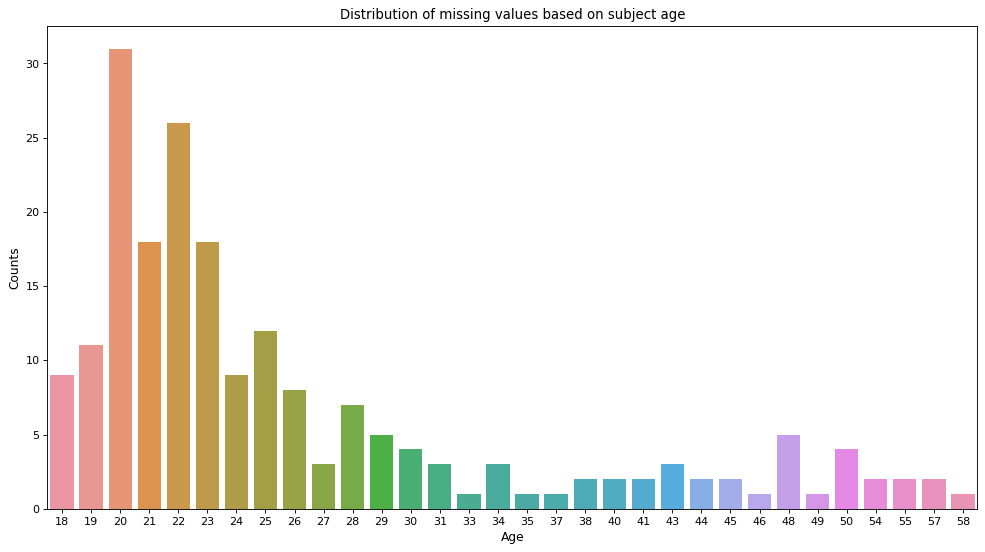

In [17]:
#Ages of subject's with missing values
nang = df_cross[df_cross['Educ'].isna() == True]['Age'].value_counts()

#Find the average age of subject's with missing values
total = 0
for idx, val in nang.iteritems():
    total = total + idx*val
m = total/sum(nang.values)
print('The average age is', m)


figure(figsize=(15, 8), dpi=80)

sns.barplot(x = nang.index, y = nang.values)
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Counts', fontsize = 11)
plt.title('Distribution of missing values based on subject age')



As we can see above, most of the missing data comes from relatively younger people. The average age is ~27. This is expected because 

In [18]:
#remove rows with missing values

df_cross = df_cross.dropna(axis = 0, how = 'any')
df_cross.reset_index(drop = True, inplace = True)
df_cross

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
211,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,F,R,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,F,R,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [19]:
#change column names
names_cross = ['Gender', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df_cross.columns = names_cross





**Data Analysis -- Cross Sectional**

**Initial Explator Data Analysis**

<AxesSubplot:title={'center':'Distribution of age based on gender'}, xlabel='Age', ylabel='Density'>

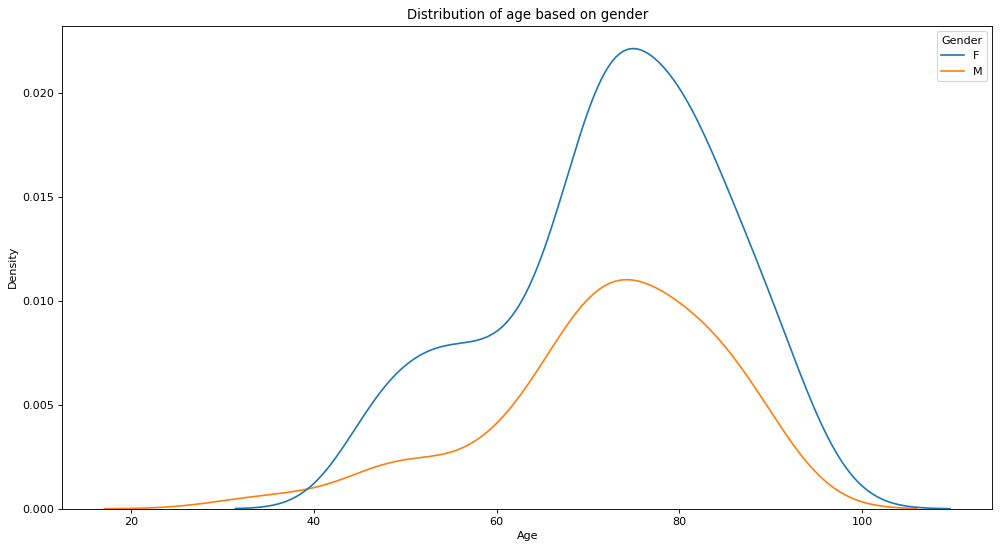

In [20]:

figure(figsize=(15, 8), dpi=80)
plt.title('Distribution of age based on gender')

sns.kdeplot(data = df_cross, x = 'Age', hue = 'Gender')
